## Final Project Submission:  Movie Performance Analysis

Please fill out:
* Student name:Sumali Wickramarachchi 
* Student pace: Part time
* Scheduled project review date/time: 12th August 2023
* Instructor name: Rajive Islam
* Blog post URL: N/A


## Overview
In this analysis I have conducted a solid evaluation of performance based on the Key Performance Indicators (KPIs) related to the film industry. This evaluation includes analysing performance metrics such as earnings, profitability, and customer ratings, while considering movies released and studio performance within a specific timeframe. Additionally, it provides insights into performance across different genres, volume, and overall industry performance.

This analysis entails gathering, processing, and interpreting data to gain insights into various aspects of the film industry's performance. It takes into account approximately 145,000 movies and 260 studios within the timeframe of 2010 to 2018. The results of this analysis would provide Microsoft with relevant insights & recommendations for making informed decisions regarding investing on a new movie studio.






## Data Understanding 
I have collected a dataset containing information about movies, studios, earnings, profitability, customer ratings, release dates, etc. Sources might include IMDb, Box Office Mojo and other film-related databases. I have ensured data is comprehensive and covers the 2010-2018 timeline.




In [180]:
# importing standard packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [181]:
# file paths
data_extract1=r"C:\Users\Sumali\Documents\dsc-phase-1-project\zippedData\imdb.title.basics.csv.gz"
data_extract2=r"C:\Users\Sumali\Documents\dsc-phase-1-project\zippedData\imdb.title.ratings.csv.gz"
data_extract3=r"C:\Users\Sumali\Documents\dsc-phase-1-project\zippedData\bom.movie_gross.csv.gz"
data_extract4=r"C:\Users\Sumali\Documents\dsc-phase-1-project\zippedData\tn.movie_budgets.csv.gz"

In [182]:
# read CSV files into Dataframes
basics=pd.read_csv(data_extract1, compression='gzip')
ratings=pd.read_csv(data_extract2, compression='gzip')
bom_gross=pd.read_csv(data_extract3, compression='gzip')
budgets=pd.read_csv(data_extract4, compression='gzip')

In [183]:
#Undertanding raw data-IMDb basics
#Data Extract- Information about various movies,titles and runtime 
basics.head(10)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [184]:
#Undertanding depth of data and data types
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [186]:
#Undertanding raw data-IMDb ratings
ratings.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [187]:
#Undertanding depth of data and data types
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [188]:
#Undertanding raw data of Box Office Mojo
bom_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [189]:
bom_gross.info()
#BOM only has 3387 movies and IMDb has 146000 movies. Only 2% of movies has created a box office record. 
#Based on this I created a "Disclaimer: Gross earnings only looks into 3400 movies during 2015-2018 period' later in my analysis & ppt. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [190]:
#Undertanding raw data for budgets 
budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [191]:
budgets.info()
#Again only 5782 movies budgets included where as there are close 146000 titles in basics file. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation



In [192]:
#current data types in data sources limit ability to analyse data. I have changed data type to float. 
#changing data type for foreign_gross from object to float 
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].apply(pd.to_numeric, errors='coerce')

In [193]:
#In order to see total gross earned I have added domestic & foregin gross sales together. 
total_gross = bom_gross['domestic_gross']+bom_gross['foreign_gross'].sum()
#I create a total_gross column to analyze the total gross earning 

In [194]:
#Adding new coloum to exsiting bom gross table
bom_gross["total_gross"]=total_gross

In [126]:
#changing total gross format to integer or float from data type object.
bom_gross['total_gross'] = bom_gross['total_gross'].apply(pd.to_numeric, errors='coerce',downcast='float')
print(total_gross)

0       1.529309e+11
1       1.528501e+11
2       1.528119e+11
3       1.528085e+11
4       1.527546e+11
            ...     
3382    1.525159e+11
3383    1.525159e+11
3384    1.525159e+11
3385    1.525159e+11
3386    1.525159e+11
Name: domestic_gross, Length: 3387, dtype: float64


In [195]:
#After changing data type
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     3359 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


In [196]:
#Undertand nature of budget data. Data type is mostly object. 
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [197]:
budgets.describe()
#Looks like data type in budget is inaccurate. So need to fix by changing data type. 

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [204]:
import pandas as pd

# Convert date to dateformat
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

# Define coloumn
money_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Convert monetary columns to numeric format
for col in money_columns:
    if budgets[col].dtype == 'object':  
        budgets[col] = budgets[col].str.replace('[\$,]', '', regex=True) 
        budgets[col] = pd.to_numeric(budgets[col], errors='coerce')       

print(budgets.dtypes)


id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object


## Data Set Mergering 





In [205]:
# I have merged ratings data with basics to a undertanding about genres
merged_df = pd.merge(basics, ratings, on='tconst')
merged_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [167]:
#There are more data merges in data analysis and evaluation section.

## Data Analysis & Evaluation 
I narrow down areas I want to evaluate into key aspects/ Key performance indicators(KPIs) which Microsoft ideally want to focus on deciding which type of studio will give ROI. 
1) Box Office Performance - Using BOM data and keeping it relevant to recent years 

2) Audience Reception:Customer rating & voting using IMDb ratings

3) Production Budget and Profitability- tn budgets

4) Genre analysis - IMDb basics

First, we will go through growth potential & recent movie YoY growth in leading studios. 

1)Box Office Performance: I have examined box office revenue as one of the crucial aspects of movie performance as it provides assurance whether a studio can generate future revenue.



In [206]:
#Currently we have IFC, Uni, WB, Fox, Magn, SPC, Sony, BV, LGF and Par as leading studios with the largetst number of tiles. But do these studios have produced more titles in the most recent  years or is this a success from the past? 
bom_gross['studio'].value_counts().head(20)

IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
Name: studio, dtype: int64

In [207]:
basics['start_year'].value_counts()
#Industry Performance: We have titles going all the way back to 2010. Assuming this is all the titles produced, from 2017 to 2018 we see a 3% drop in number of titles produced.
#Drop from 2019 can be due to incomplete data or impact from pandemic. The analysis focus on 2017-2018 as more recent. This is to be more accurate & avoid insights based on missing data.


2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [177]:
bom_gross['year'].value_counts()
#I have analysed ones with the highest revenue potential by limiting to box office records for better ROI potential for investors. Box office records drop by 25% during 2017 to 2018.This can be due to economic factors, competition from streaming services & changing viewing habits 

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [208]:
# I have created a pivot to identify where studios have produced a large number of movies, has it been done recently or success on the past. This would be good indication of current operational capability & efficency where a studio can produce more movies. 
import pandas as pd
pivot_table = pd.pivot_table(bom_gross, values='title', index='studio', columns='year', aggfunc='count', fill_value=0)

# Add  a Total column pivot table
pivot_table['Total'] = pivot_table.sum(axis=1)

# Sort the pivot table by the Total column format descending
pivot_table = pivot_table.sort_values(by='Total', ascending=False).head(20)

print(pivot_table)
#Uni, WB, Fox, Sony, BV studios has provided consistent amount of movies in the recent years. 

year    2010  2011  2012  2013  2014  2015  2016  2017  2018  Total
studio                                                             
IFC       22    33    22    17    18    21    16     9     8    166
Uni.      15    15    16    16    14    21    15    14    21    147
WB        19    17    15    11    18    18    12    13    17    140
Fox       17    15    15    14    17    17    16    14    11    136
Magn.     16    21    23    10    19    15    17     9     6    136
SPC       19    16    15    15    12    16    11     9    10    123
Sony      10    13    13     8    10    10    15    16    15    110
BV        14    14    13    10    13    11    13     8    10    106
LGF       14     9    12    12     9    13    13     9    12    103
Par.      10    12    11     9    12    12    15    12     8    101
Eros       8    14    15    14     9    10     9     2     8     89
Wein.      4    12    13    14    14    10     4     6     0     77
CL         2     9    10     6     9    16    12

In [209]:
# Top 30 movies earning more than 1 billon domestic_gross.
bom_gross.loc[bom_gross['domestic_gross'] < 1000000000,].head(30)
#Looking at a glance BV, WB,Par,Uni are leading box office movie creators based on domestic gross sales. 

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.529309e+11
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.528501e+11
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,1.528119e+11
3,Inception,WB,292600000.0,535700000.0,2010,1.528085e+11
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,1.527546e+11
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,1.528164e+11
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,1.528283e+11
7,Tangled,BV,200800000.0,391000000.0,2010,1.527167e+11
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,1.527674e+11
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,1.527335e+11


In [210]:
#Movies earning more than 1 billon foreign gross 
bom_gross.loc[bom_gross['foreign_gross'] < 1000000000,].head(20)
#Looking at glass BV, WB,Par, Uni,Fox are leading box office movie creators based on the foregin gross sales. 

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.529309e+11
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.528501e+11
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,1.528119e+11
3,Inception,WB,292600000.0,535700000.0,2010,1.528085e+11
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,1.527546e+11
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,1.528164e+11
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,1.528283e+11
7,Tangled,BV,200800000.0,391000000.0,2010,1.527167e+11
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,1.527674e+11
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,1.527335e+11


In [211]:
# I have created a pivot to identify studios by total gross sales to identify recent sales trends across key studios by decending order.  
import pandas as pd
pivot_table = pd.pivot_table(bom_gross, values='total_gross', index='studio', columns='year', aggfunc='sum', fill_value=0)

# Add a Total column to the pivot table
pivot_table['Total'] = pivot_table.sum(axis=1)

# Sort the pivot table by the Total in descending order
pivot_table = pivot_table.sort_values(by='Total', ascending=False).head(20)

print(pivot_table)


year             2010           2011           2012           2013  \
studio                                                               
IFC     3355355644726  5033045477939  3355357892326  2592778518710   
Uni.    2288611528745  2288716228745  2441681937328  2441722637328   
WB      2899321336077  2594345645911  2288933997745  1678790294413   
Fox     2593735045911  2288755828745  2288758928744  2136245020162   
Magn.   2440263231128  3202841784143  3507882583909  1525160881530   
SPC     2897854186077  2440350757328  2287783000744  2287800241745   
Sony    1373561777246  1983696911579  1984142411579  1220944068663   
BV      2136741849362  2136420220162  1984282711579  1526975485830   
LGF     2135733420162  1372823538247  1830982402996  1830870097996   
Par.    1526261451830  1831475802996  1678161094413  1373664277247   
Eros    1220133363664  2135233909962  2287752849745  2135235097862   
Wein.    610210992332  1830341099096  1983083290378  2135527801162   
CL       30503230716

In [212]:
#I have used this lookup to convert to billions to include in charts
studios = ['IFC', 'Uni.', 'WB', 'Fox', 'Magn.', 'SPC',
    'Sony', 'BV', 'LGF', 'Par.', 'Eros', 'Wein.',
    'CL', 'Strand', 'FoxS', 'RAtt.', 'KL', 'Focus',
    'WGUSA', 'CJ']
values = [1220137495564, 3204624535243, 2594499545911, 1678515294413,
    915099002998, 1525179498830, 2288695321245, 1528204685830,
    1830418358396, 1220895268664, 1220130640564, 0, 610063944532,
    457547777649, 610150134332, 610070284332, 610063858832, 1067723260081,
    1220130778764, 915096524098]
int_values = []
for value in values:
    int_values.append(int(value)/100000000000)

print(int_values)

[12.20137495564, 32.04624535243, 25.94499545911, 16.78515294413, 9.15099002998, 15.2517949883, 22.88695321245, 15.2820468583, 18.30418358396, 12.20895268664, 12.20130640564, 0.0, 6.10063944532, 4.57547777649, 6.10150134332, 6.10070284332, 6.10063858832, 10.67723260081, 12.20130778764, 9.15096524098]


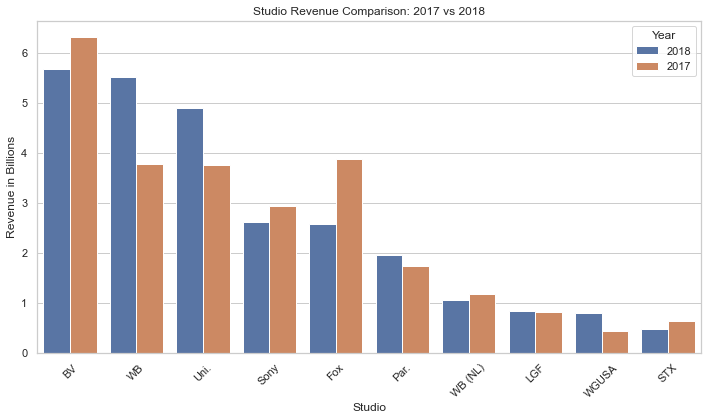

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# created a dataframe using pivot above to get 2017 and 2018 revenue by studio.I selected grouped bar plot as it shows a comparison 
data = {
    'Studio': ['BV', 'WB', 'Uni.', 'Sony', 'Fox', 'Par.', 'WB (NL)', 'LGF', 'WGUSA', 'STX'],
    '2018': [5.67, 5.52, 4.90, 2.62, 2.58, 1.95, 1.06, 0.83, 0.80, 0.47],
    '2017': [6.32, 3.77, 3.76, 2.93, 3.87, 1.74, 1.17, 0.81, 0.44, 0.63],}

df = pd.DataFrame(data)

# I changed the dataframe to make it suitable for plotting
melted_df = df.melt(id_vars='Studio', var_name='Year', value_name='Revenue')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Studio', y='Revenue', hue='Year', data=melted_df)

# Add labels and title
plt.xlabel('Studio')
plt.ylabel('Revenue in Billions')
plt.title('Studio Revenue Comparison: 2017 vs 2018')
plt.legend(title='Year')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






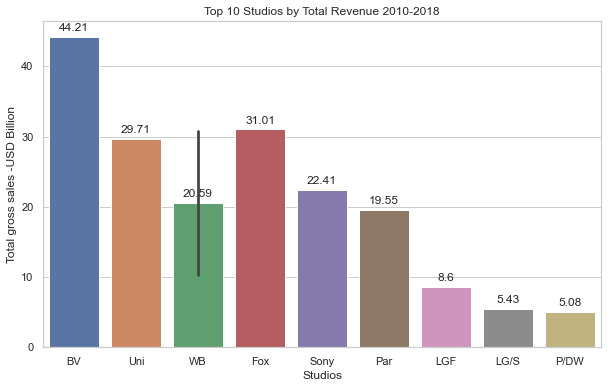

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {'studios': ['BV', 'Uni', 'WB', 'Fox','Sony', 'Par','LGF', 'WB','LG/S','P/DW'],
        'Total gross sales': [44.21, 29.71, 30.84, 31.01, 22.41, 19.55,8.6,10.33,5.43,5.08]}
df = pd.DataFrame(data)
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot  # Set the figure size
plt.figure(figsize=(10, 6)) 
ax=sns.barplot(x='studios', y='Total gross sales', data=df)

# Set labels and title
plt.xlabel('Studios')
plt.ylabel('Total gross sales - USD Billion')
plt.title('Top 10 Studios by Total Revenue 2010-2018')
ax.set(xlabel='Studios', ylabel='Total gross sales -USD Billion')
for p in ax.patches:
    label = format(p.get_height(), '.2f').rstrip('0').rstrip('.')
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
# Show the plot
plt.show()

In [214]:
#Created a view to understand how many titles has been created to generate BOM earnings by each studio 
bom_gross['studio'].value_counts().head(20)

IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
Name: studio, dtype: int64

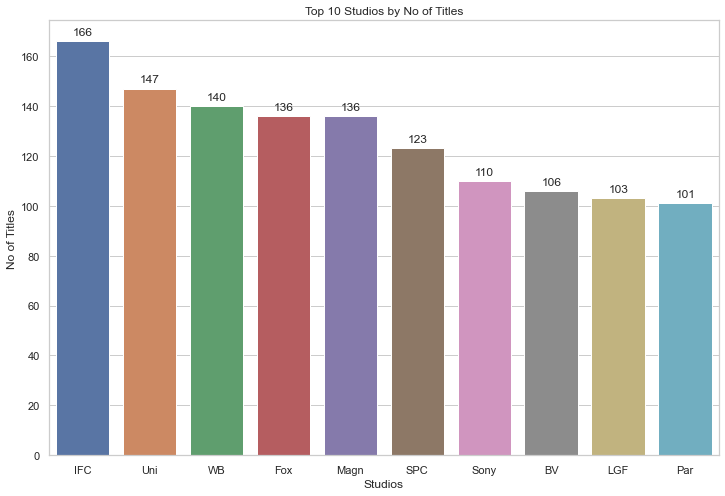

In [149]:
# Create a bar chart to compare easily. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {'Studios': ['IFC', 'Uni', 'WB', 'Fox', 'Magn','SPC', 'Sony','BV','LGF','Par'],
        'titles': [166, 147, 140, 136, 136, 123,110,106,103,101]}
df = pd.DataFrame(data)
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
ax=sns.barplot(x='Studios', y='titles', data=df)

# Set labels and title
plt.xlabel('Studios')
plt.ylabel('No of Tiles')
plt.title('Top 10 Studios by No of Titles')
ax.set(xlabel='Studios', ylabel='No of Titles')
for p in ax.patches:
    label = format(p.get_height(), '.2f').rstrip('0').rstrip('.')
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()
#findings-IFC, Uni, WB, FOX, Magn owns majority of box offic movies all time.  

2)Audience Reception: Analyzing audience reviews, ratings, and sentiments is essential in understanding how well the movies were received by the target audience.



In [215]:
#Undertand nature of rating data & depth 
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [216]:
ratings.describe()
#Gernarlly a movie is given a 6.3 rating. Highest rated movies receive solid 10 and a movie with low performance receive 1. 

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [58]:
ratings.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [82]:
ratings['averagerating'].value_counts().head(50)
#For high ratings usually at lease 2000 reviews has been provided. 
#For low rating less no of reviews (less than 600) perhaps due to less popularity. 

7.0    2262
6.6    2251
7.2    2249
6.8    2239
6.5    2221
6.2    2197
6.4    2171
6.7    2084
6.3    2055
7.1    2055
6.9    1928
6.0    1877
6.1    1835
7.4    1824
7.3    1799
5.8    1719
7.6    1655
5.6    1626
7.5    1593
5.9    1550
5.7    1533
7.8    1519
7.7    1422
5.4    1380
5.5    1343
5.2    1246
8.0    1228
5.3    1209
8.2    1179
7.9    1081
5.0    1059
5.1    1043
8.1     972
4.8     958
8.3     874
4.9     834
8.4     833
4.6     829
4.7     789
8.5     741
4.5     740
4.4     694
8.6     665
4.3     625
4.2     597
8.8     567
8.7     542
4.1     528
4.0     528
3.8     493
Name: averagerating, dtype: int64

In [217]:
#I have merged basics and ratings to get genres
merged_df = pd.merge(basics, ratings, on='tconst')
merged_df.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


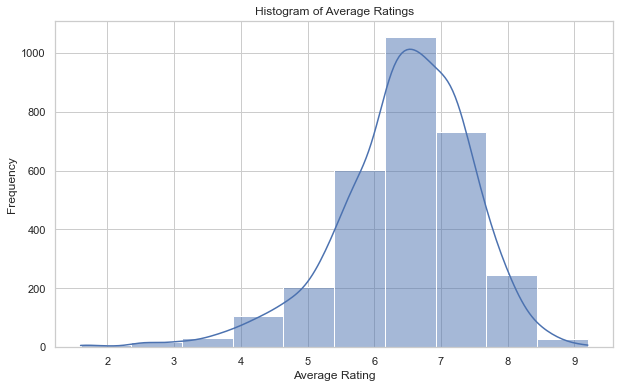

In [125]:
#I have created a histogram to undertand distribution of ratings. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='averagerating', bins=10, kde=True)

# Set labels and title
plt.xlabel('Average Rating')
plt.ylabel('No of titles')
plt.title('Histogram of Average Ratings')

# Show the plot
plt.show()
#Findings
#Users have provvided rating close to average 6.3. We can use this as a benchmark when accessing title rating by studio. 

In [220]:
#I have merged data again with box office data to get a view of title ratings by studio. This will help to decide what's the overall studio rating for high performing movies 
merged_df2 = pd.merge(merged_df, bom_gross, left_on='primary_title', right_on='title', how='inner')
merged_df2.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,1.525170e+11
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,1.525167e+11
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012,1.525167e+11
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012,1.525167e+11
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,1.525741e+11
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,1.525422e+11
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,NaN,2015,1.531682e+11
7,tt0372538,Spy,Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Spy,Fox,110800000.0,124800000.0,2015,1.526267e+11
8,tt3079380,Spy,Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Spy,Fox,110800000.0,124800000.0,2015,1.526267e+11
9,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary,FD,13100000.0,10800000.0,2011,1.525290e+11


In [221]:
#I grouped data to get list of ratings by studio
grouped = merged_df2.groupby(['studio'])['averagerating'].mean()
grouped = grouped.sort_values(ascending=False)
grouped.head(30)

studio
Trafalgar    8.800000
NAV          8.700000
GrtIndia     8.300000
SHO          8.200000
Pala.        8.100000
BSC          8.100000
PDA          8.000000
App.         7.900000
Good Deed    7.800000
MUBI         7.700000
WOW          7.700000
U/P          7.700000
RME          7.700000
SD           7.666667
Elev.        7.650000
NGE          7.600000
Abr.         7.557143
UTMW         7.550000
BBC          7.550000
ICir         7.500000
Abk.         7.500000
Cleopatra    7.400000
GK           7.341176
NM           7.300000
Kino         7.300000
FEF          7.300000
Dreamwest    7.300000
B360         7.300000
CF&SR        7.300000
Rel.         7.250000
Name: averagerating, dtype: float64

In [222]:
# I have taken number of votes into account as well. This is a indication of top 10 popular studios
grouped1 = merged_df2.groupby(['studio'])['numvotes'].sum()
grouped1 = grouped1.sort_values(ascending=False)
grouped1.head(20)

studio
WB         21726881
BV         19217339
Fox        18514704
Uni.       17979643
Par.       15392837
Sony       11137590
LGF         8126284
Wein.       7079427
WB (NL)     6387644
FoxS        5936854
LG/S        4707209
Focus       4570743
SPC         4327904
A24         2945783
IFC         2783647
Magn.       2527096
SGem        2520515
ORF         2472844
Rela.       2193823
P/DW        2134620
Name: numvotes, dtype: int64

In [223]:
#I wanted to compare top earning studios with their ratings. 
df4 = pd.merge(grouped, grouped1, on='studio')
top_studios = ['BV', 'Uni', 'WB', 'Fox','Sony', 'Par','LGF', 'WB','LG/S','P/DW']
filtered_df = df4.query('`studio` in @top_studios')

filtered_df.head(10)

,averagerating,numvotes
studio,,
BV,6.919588,19217339
P/DW,6.760000,2134620
WB,6.538655,21726881
LG/S,6.440541,4707209
Fox,6.293478,18514704
LGF,6.235165,8126284
Sony,6.201124,11137590


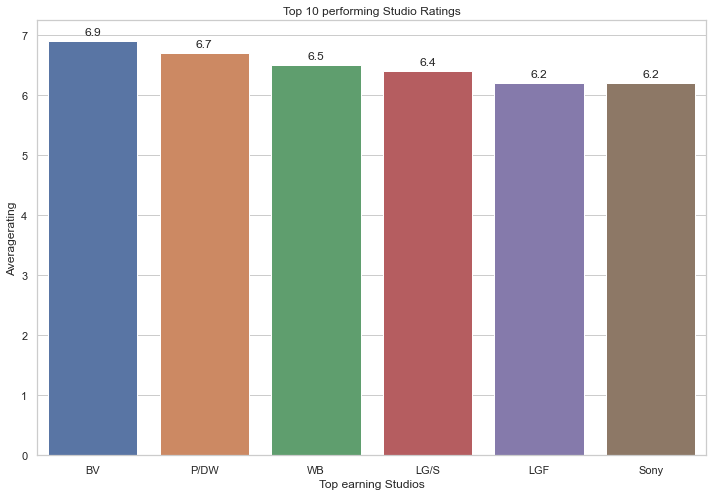

In [168]:
#I have visualised the results as follows,
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {'studio_x': ['BV', 'P/DW', 'WB', 'LG/S', 'LGF', 'Sony'],
        'averagerating': [6.9, 6.7, 6.5, 6.4, 6.2, 6.2]}
df = pd.DataFrame(data)
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
ax=sns.barplot(x='studio_x', y='averagerating', data=df)

# Set labels and title
plt.xlabel('Studios')
plt.ylabel('Average Rating')
plt.title('Top 10 performing Studio Ratings')
ax.set(xlabel='Top earning Studios', ylabel='Averagerating')
for p in ax.patches:
    label = format(p.get_height(), '.2f').rstrip('0').rstrip('.')
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
# Show the plot
plt.show()

3)Production Budget and Profitability: Evaluating the production budget and comparing it with the box office performance helps to assess the movies profitability.


In [224]:
# data after assigning correct data type for currency columns & date columns.
budgets.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923


In [225]:
# I created new column to get gross profit
budgets['gross_profit'] = budgets['worldwide_gross'] - budgets['production_budget']

In [137]:
budgets.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425
8,9,2017-11-17,Justice League,300000000,229024295,655945209,355945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923,579620923


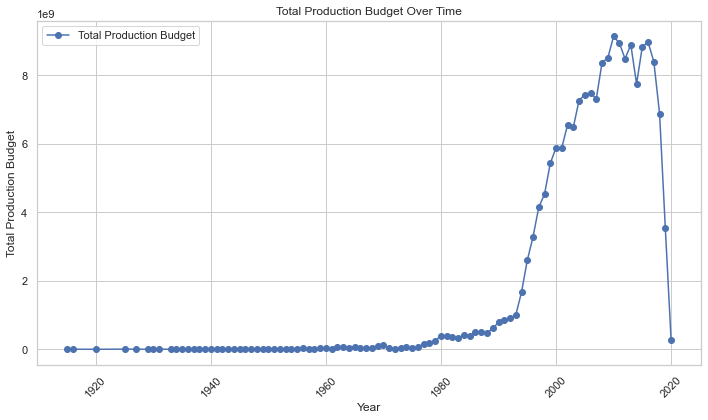

In [226]:
#I wanted to analyse overall cost and profit in the past years. To do that I created a line graph. 
import pandas as pd
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a line graph with total sum for each year
plt.plot(sum_by_year.index, sum_by_year.values, marker='o', linestyle='-', color='b', label='Total Production Budget')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Production Budget')
plt.title('Total Production Budget Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()
#Findings-#Production cost has increased up to 8 billion in 2018. Huge drop in 2019-2020 shows data is missing. 

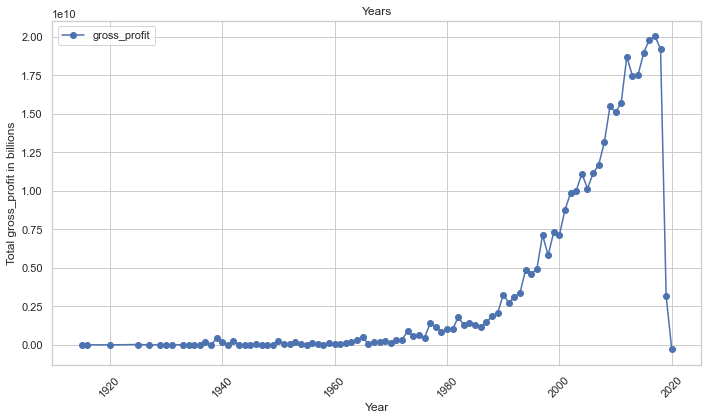

In [227]:
# Visualising gross profit 
import pandas as pd
import matplotlib.pyplot as plt
#Fixing date format
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

# Group the data by year and calculate the sum of production_budget
sum_by_year = budgets.groupby(budgets['release_date'].dt.year)['gross_profit'].sum()

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a line graph with total for each year
plt.plot(sum_by_year.index, sum_by_year.values, marker='o', linestyle='-', color='b', label='gross_profit')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total gross_profit in billions')
plt.title('Years')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()
#Gross profit has increased up to 2 billion in 2018 which shows opportunity to grow in the industry.Star Industry as per BCG Metric (High Marketshare and High marget growth) Huge drop in 2019-2020 shows data missing.Overall 20% gross profit margin can be expected.  

In [140]:
#Data merging to understand gross profitability for a movie by studio
merged_df3 = pd.merge(budgets, bom_gross, left_on='movie', right_on='title', how='inner')
merged_df3.head(20)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,title,studio,domestic_gross_y,foreign_gross,year,total_gross
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,1.527570e+11
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.529749e+11
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,BV,678800000.0,NaN,2018,1.531947e+11
3,9,2017-11-17,Justice League,300000000,229024295,655945209,355945209,Justice League,WB,229000000.0,428900000.0,2017,1.527449e+11
4,10,2015-11-06,Spectre,300000000,200074175,879620923,579620923,Spectre,Sony,200100000.0,680600000.0,2015,1.527160e+11
5,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,809439099,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.529640e+11
6,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,118151347,Solo: A Star Wars Story,BV,213800000.0,179200000.0,2018,1.527297e+11
7,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,-14997885,The Lone Ranger,BV,89300000.0,171200000.0,2013,1.526052e+11
8,14,2012-03-09,John Carter,275000000,73058679,282778100,7778100,John Carter,BV,73100000.0,211100000.0,2012,1.525890e+11
9,15,2010-11-24,Tangled,260000000,200821936,586477240,326477240,Tangled,BV,200800000.0,391000000.0,2010,1.527167e+11


In [141]:
#Summerise by studio and sort for High perfroming 
grouped = merged_df3.groupby(['studio'])['gross_profit'].mean()
grouped = grouped.sort_values(ascending=False)
grouped.head(30)

studio
P/DW        3.744028e+08
BV          3.310447e+08
GrtIndia    2.335029e+08
Uni.        1.771931e+08
Fox         1.730938e+08
WB (NL)     1.727639e+08
Sony        1.696123e+08
WB          1.372168e+08
Par.        1.306514e+08
Strand      1.292782e+08
MGM         9.677964e+07
UTV         9.501160e+07
Sum.        8.573647e+07
MBox        8.103616e+07
LGF         8.055740e+07
LG/S        6.959919e+07
SGem        6.687388e+07
TriS        6.370211e+07
W/Dim.      5.204399e+07
Wein.       4.834126e+07
STX         4.324319e+07
Neon        4.279741e+07
Eros        4.225397e+07
CJ          3.649653e+07
Focus       3.605226e+07
FoxS        3.581295e+07
FD          3.366012e+07
CBS         3.236630e+07
Rela.       2.801267e+07
Studio 8    2.228643e+07
Name: gross_profit, dtype: float64

In [198]:
#Converting scentific values to int
studios = ['P/DW', 'BV', 'GrtIndia', 'Uni.', 'Fox', 'WB (NL)', 'Sony', 'WB', 'Par.', 'Strand']
values = [3.744028e+08, 3.310447e+08, 2.335029e+08, 1.771931e+08, 1.730938e+08, 1.727639e+08, 1.696123e+08, 1.372168e+08, 1.306514e+08, 1.292782e+08]
int_values = []
for value in values:
    int_values.append(int(value))

print(int_values)

[374402800, 331044700, 233502900, 177193100, 173093800, 172763900, 169612300, 137216800, 130651400, 129278200]


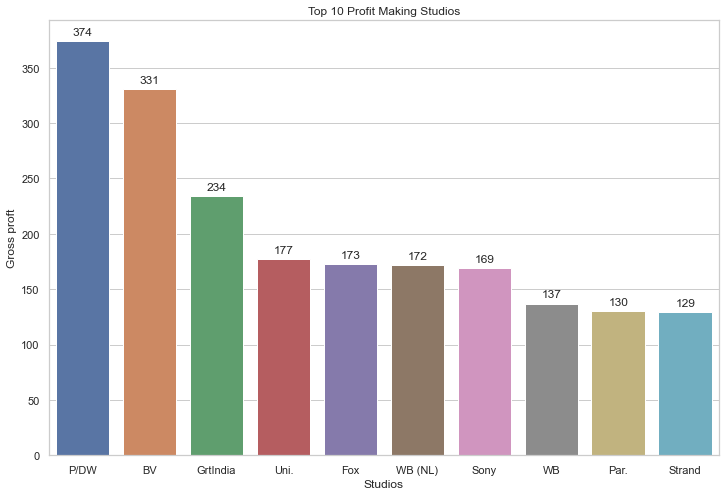

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {'studio_x': ['P/DW', 'BV', 'GrtIndia', 'Uni.', 'Fox', 'WB (NL)', 'Sony', 'WB', 'Par.', 'Strand'],
        'gross_proft': [374, 331, 234, 177, 173, 172, 169, 137, 130, 129]}
df = pd.DataFrame(data)
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
ax=sns.barplot(x='studio_x', y='gross_proft', data=df)

# Set labels and title
plt.xlabel('Studios')
plt.ylabel('Gross proft in Millions')
plt.title('Top 10 Profit Making Studios')
ax.set(xlabel='Studios', ylabel='Gross proft')
for p in ax.patches:
    label = format(p.get_height(), '.2f').rstrip('0').rstrip('.')
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
# Show the plot
plt.show()
#Findings - P/DW seem to have highest gross proftability followed by BV 

4)Genre Analysis: Understanding the popularity and performance of different movie genres allows for targeted investments in specific types of films.


In [143]:
#Based on titles produced from 2010 most of them are documentary, drama and comedy. But do they generate highest income?
basics['genres'].value_counts().head(20)

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

In [225]:
#I have merged gross profit data frame with IMDb basics to see profitable Genres
merged_df4 = pd.merge(merged_df3, basics, left_on='movie', right_on='primary_title', how='inner')
merged_df4.head(20)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,title,studio,domestic_gross_y,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,Justice League,WB,229000000.0,428900000,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,Spectre,Sony,200100000.0,680600000,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller"
5,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,8.094391e+08,The Dark Knight Rises,WB,448100000.0,636800000,2012,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
6,12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,1.181513e+08,Solo: A Star Wars Story,BV,213800000.0,179200000,2018,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy"
7,13,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-1.499788e+07,The Lone Ranger,BV,89300000.0,171200000,2013,tt1210819,The Lone Ranger,The Lone Ranger,2013,150.0,"Action,Adventure,Western"
8,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,7.778100e+06,John Carter,BV,73100000.0,211100000,2012,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi"
9,15,2010-11-24,Tangled,260000000.0,200821936.0,5.864772e+08,3.264772e+08,Tangled,BV,200800000.0,391000000,2010,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy"


In [153]:
#Gross profit by Genres (Top 30)
merged_df4 = pd.merge(merged_df3, basics, left_on='movie', right_on='primary_title', how='inner')
grouped = merged_df4.groupby(['genres'])['gross_profit'].sum()
grouped = grouped.sort_values(ascending=False)
grouped.head(30)

genres
Action,Adventure,Sci-Fi       22049485349
Adventure,Animation,Comedy    19842858419
Action,Adventure,Fantasy       7264715004
Action,Adventure,Comedy        5662150479
Drama                          5360210239
Action,Adventure,Animation     4523406683
Documentary                    3821840714
Action,Crime,Thriller          3417867141
Horror,Mystery,Thriller        2813263102
Action,Adventure,Thriller      2777541114
Action,Adventure,Drama         2767263665
Comedy                         2737526257
Action,Thriller                2513217735
Comedy,Romance                 2339919045
Horror                         2193554658
Comedy,Drama,Romance           2062488401
Adventure,Family,Fantasy       1827640731
Comedy,Drama                   1812688824
Animation,Comedy,Family        1759076260
Action,Comedy,Crime            1697513120
Drama,Romance                  1580168188
Horror,Thriller                1531710292
Biography,Drama,History        1501630672
Adventure,Fantasy          

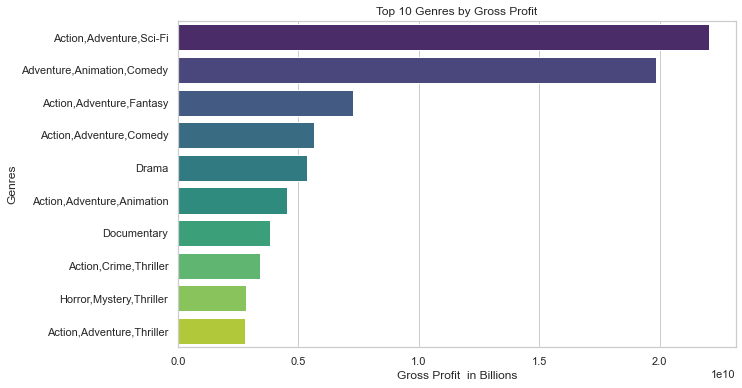

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_10_genres = grouped.head(10)

# Convert the  DataFrame for visualization
top_10_genres_df = top_10_genres.reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='gross_profit', y='genres', data=top_10_genres_df, palette='viridis')

# Customize the plot
plt.title('Top 10 Genres by Gross Profit')
plt.xlabel('Gross Profit  in Billions')
plt.ylabel('Genres')

# Display the plot
plt.show()


In [148]:
# Group by genres and studio, and calculate gross profit
merged_df4 = pd.merge(merged_df3, basics, left_on='movie', right_on='primary_title', how='inner')
grouped = merged_df4.groupby(['genres', 'studio'])['gross_profit'].sum()
grouped = grouped.sort_values(ascending=False)
top_30 = grouped.head(30)
print(top_30)

genres                      studio 
Adventure,Animation,Comedy  BV         7778052717
Action,Adventure,Sci-Fi     BV         7275550917
Action,Adventure,Fantasy    WB         3932111427
Adventure,Animation,Comedy  Uni.       3882688885
                            Fox        3717508373
Action,Adventure,Sci-Fi     Par.       2988778692
                            Uni.       2887785771
Action,Crime,Thriller       Uni.       2768397519
Action,Adventure,Sci-Fi     LGF        2463353344
Action,Adventure,Fantasy    BV         2317463441
Adventure,Animation,Comedy  Sony       2263009826
Action,Adventure,Comedy     BV         2149850649
                            Fox        2050923747
Action,Adventure,Sci-Fi     WB         2011433233
                            Sony       1752052953
                            Fox        1715669291
Action,Adventure,Thriller   Sony       1668879273
Drama                       Uni.       1532880108
Action,Adventure,Animation  BV         1529648539
              

In [145]:
#Gross profit by Genres (Bottom 20)
merged_df4 = pd.merge(merged_df3, basics, left_on='movie', right_on='primary_title', how='inner')
grouped = merged_df4.groupby(['genres'])['gross_profit'].sum()
grouped = grouped.sort_values(ascending=True)
grouped.head(20)

genres
Action,Family,Fantasy          -69533984
Crime,Drama,History            -64170689
Action,Fantasy,Western         -33485675
Biography,Drama,War            -31979010
Adventure,Drama,Romance        -30093543
Action,Biography,Crime         -26278012
Documentary,Drama,Family       -23076041
Fantasy,Thriller               -21785949
Western                        -21405773
Action,Drama,Western           -21228655
Action,Sport                   -21213248
Action,Crime,Sci-Fi            -19064147
Biography,Documentary,Family   -18430911
Action,Adventure,Western       -18280578
Drama,History,Romance          -18207232
Documentary,War                -17174509
Romance                        -15492657
Sport                          -13254497
Action,Drama,War               -11912207
Action,Comedy,Mystery          -11684491
Name: gross_profit, dtype: int64

In [230]:
# Group data by genre and studio and calculate total gross profit
merged_df4 = pd.merge(merged_df3, basics, left_on='movie', right_on='primary_title', how='inner')
grouped5 = merged_df4.groupby(['genres', 'studio'])['gross_profit'].sum().reset_index()
grouped5.head(20)

,genres,studio,gross_profit
0,Action,ALP,-2.307604e+07
1,Action,EOne,2.452892e+07
2,Action,FCW,-5.446814e+06
3,Action,FoxS,2.758851e+07
4,Action,ORF,-2.373330e+07
5,Action,STX,1.057834e+08
6,Action,UTV,2.851546e+08
7,Action,Uni.,2.592950e+08
8,"Action,Adventure",Free,-4.488226e+06
9,"Action,Adventure,Animation",BV,1.529649e+09


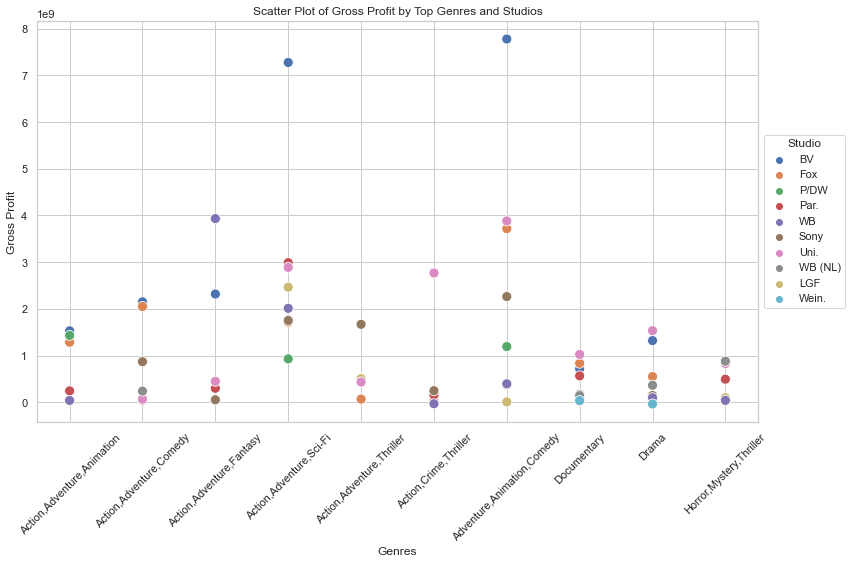

In [243]:
#I have created scatterplot to show top genres by Studios 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# selected the top categories based on gross profit
top_categories = grouped5.groupby('genres')['gross_profit'].sum().nlargest(10).index
top_categories_data = grouped5[grouped5['genres'].isin(top_categories)]

# Then selected the top 10 studios based on gross profit
top_studios = grouped5.groupby('studio')['gross_profit'].sum().nlargest(10).index
top_studios_data = top_categories_data[top_categories_data['studio'].isin(top_studios)]

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_studios_data, x='genres', y='gross_profit', hue='studio', marker='o', s=100)

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Gross Profit')
plt.title('Scatter Plot of Gross Profit by Top Genres and Studios')

# Move the legend to the right as it was distracting 
plt.legend(title='Studio', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## Evaluation
***
Intepreation of results


Box Office Performance Overview:

It has becomes evident that studios such as BV, WB, Par, and Uni have emerged as prominent contributors to the movie industry, proven by their impressive domestic gross sales figures. Furthermore, when analyzing international markets, a similar trend emerges. 
In terms of production consistency, Uni, WB, Fox, Sony, and BV studios have demonstrated consistently releasing a substantial number of movies each year, thereby reflecting a sustained and stable output.
WB, which has exhibited remarkable growth, 46% increase in total revenue and BV (Buena Vista aka Walt Disney) showed decrease of 10% in gross profit. 

Audience Engagement and Satisfaction:

WB, BV, Fox, Uni, Par, and Sony shine as the preferred choices for individuals seeking meaningful interactions and avenues to provide valuable feedback. When it comes to movie ratings, BV emerges as a standout performer with an impressive average rating of 6.9 following closely by P/DW and W/B. These ratings not only surpass the industry's average but also reflect the elevated satisfaction levels that audiences experience with the captivating and engaging content produced by these studios.

Industry Performance & Profitability:

In recent years production costs increasing to a remarkable 8 billion in 2018 & gross profit to 2 billion. This substantial increase underscores the industry's resilience and potential for further growth. As per BCG metrix known as a star industry with high growth & high marketshare. From studios, PD/W takes the lead, garnering an impressive 374 million in earnings followed by BV 331 million, Gritindia 234 million and WB stands at notable 137 Million. Studies shows it will take at least 12 years to acquire maturity in the industry to generate postive NPV/ ROI creating own content/ studio without right partnerships often challenging. 

Profitable Genres: Fiction, Adventure, Sci-Fi, Animation, Comedy, Fantasy, and Drama rise as the major contributors for revenue in the industry. BV seem have a distingused precense in Adventure, Animation, Comedy, Action, Adventure,Sci-Fis. WB seem to thrive Fantasy Genre along with Adventure. 

Data Confidence 
I possess a strong level of confidence in the generalizability of my results beyond the dataset at hand. The completeness of data only applicable to 2018 hence it does not underly changes in industry beyond 2018 where circumstances have diversly changed due to global pandemic,consumer habits, economic situations and changes in streaming platforms.  

Business use of model 
I believe this model can be adopted to identify performance in film industry as it analyses the key aspects of success to monitor. The measures taken into account are industry leading KPIs on which an investor would be focused on acquiring a new venture. 



## Conclusions

Recommendation 1: Focus on acquistion over organic growth as it takes years to get established & face competitive environment. 
In relation to studio acquisition focus on Studio BV (Buena Vista) as a good choice followed by WB (Warner Bros). BV has more market share (both recent & past), better customer perception & profitability and more animation capability and proven success over creating high ROI titles (Quality vs Quantity). WB has same potential but currently operating slightly lesser scale compared to BV depending on the acquisition budget it would be a good second choice. This will also allow to acquire intellectual properties e.g. movie series with high & consistent revenue potential. 

Recommendation 2: Consider investing more on Action, Adventure, Sci-Fi, Adventure, Animation, Comedy & Drama genres as they can become more profitable and have more revenue generating potential.

Recommendation 2: Microsoft can bring synergistic benefits to reduce increasing product budgets by introducing new green production techniques driven solutions, better resource management, cost effective equipment and adjusting crew size and skill mix without compromising on the quality and artistic vision of the project .

As part of the analysis we have not considered other factors that can create a profound impact on studios such as digital and home entertainment, critic reviews, demographics & geographics of consumers, academy awards  & nominees.
Including most recent data relate to 2019-2022 (post pandemic) and analysing consumer sentiments would further elevate this study's findings.